<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/6__deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

x_train_shape (60000, 28, 28)
y_train_shape (60000,)
x_test_shape (10000, 28, 28)
y_test_shape (10000,)
X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)
Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)
Y Training matrix shape (60000, 10)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           2,570 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8775 - loss: 0.4173
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9739 - loss: 0.0881
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9843 - loss: 0.0501
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9883 - loss: 0.0367
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9914 - loss: 0.0247
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9925 - loss: 0.0214
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9948 - loss: 0.0156
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9963 - loss: 0.0115
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9958 - loss: 0.0129
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9957 - loss: 0.0113
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.9967 - loss: 0.0094
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 

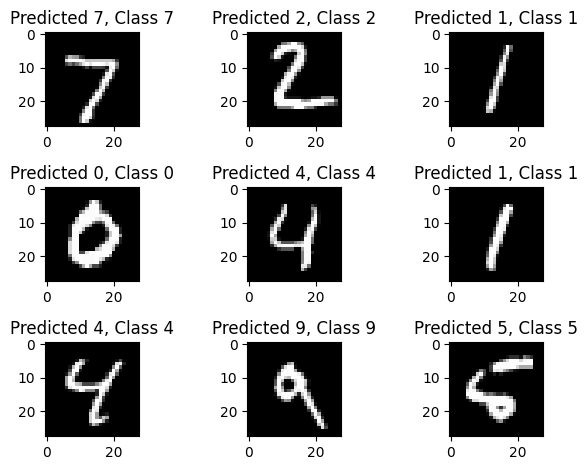

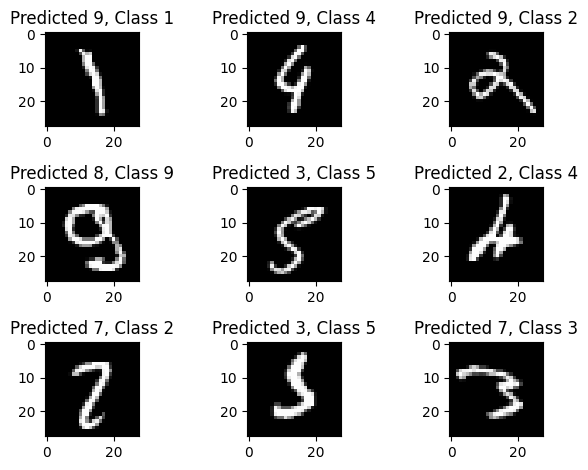

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('x_train_shape', x_train.shape)
print('y_train_shape', y_train.shape)
print('x_test_shape', x_test.shape)
print('y_test_shape', y_test.shape)

X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

"""
to_categorical: Keras의 유틸리티 함수로, 정수 레이블을 원-핫 인코딩 형태로 변환합니다.
원-핫 인코딩은 각 클래스를 이진 벡터로 표현하는 방법입니다.
예를 들어, 클래스 0은 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], 클래스 1은 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]와 같이 표현됩니다.
"""
Y_train = to_categorical(y_train, 10)
print("Y Training matrix shape", Y_train.shape)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1) #epochs 값을 1부터 증가하면서 보면 Incorrect_indices가 줄어드는 것을 알수있음

score = model.evaluate(X_test, Y_test)
print('Test score(loss):', score[0])
print('Test accuracy(accuracy):', score[1])

predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
print("correct_indices = ", correct_indices)
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("incorrect_indices = ", incorrect_indices)

#print(incorrect_indices)

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    correct = correct_indices[i]
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.tight_layout()

plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    incorrect = incorrect_indices[i]
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.tight_layout()

